# epPCR run for the main manuscrtipt

#### Command to run docker:

If you seek to replicate these results, please use LevSeq version 1.2.4.

Also the data to repeat these experiments is available at [zenodo link](https://zenodo.org/records/13694463).

Once you have the data from zenodo downloaded please have the ParLQ-ep1 and ParLQ-ep2 in separate folders then for each `cd` into the directory with the data and run the following commands:


#### LevSeq command for ep1
```
docker run --rm -v "$(pwd):/levseq_results" yueminglong/levseq:levseq-1.1.1-arm64 /levseq_results/parLQ_20240421 /levseq_results/20240421 /levseq_results/20240421-YL-ParLQ-ep1.csv
```
#### LevSeq command for ep2
```
docker run --rm -v "$(pwd):/levseq_results" levseq /levseq_results/parLQ_20240421 /levseq_results/20240421 /levseq_results/20240421-YL-ParLQ-ep1.csv
```

#### Description

1. `"$(pwd):/levseq_results"` is the path to where you downloaded the raw data from zenodo i.e. we expect you to run it from there otherwise put in the full path rather than `pwd()`
2. `yueminglong/levseq:levseq-1.1.1-arm64` is the docker image (if you are pulling), since I ran this on a mac M1 I used this one! Use just levseq if you run locally.
3. `levseq_results/parLQ_20240502/` name of the folder that the data will be output into
4. `/levseq_results/2024050` name of the folder with the data
5. `levseq_results/20240502-YL-ParLQ-ep2.csv` name of the csv reference file



## Imports

For the manuscript we used LevSeq version 1.2.4.

In [46]:
from levseq import *
%load_ext autoreload
%autoreload 2
from levseq.seqfit import process_plate_files, gen_seqfitvis, normalise_calculate_stats
import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load and process the plates

These were run on two different dates, four plates in one run and then six plates in another run.

In [47]:
processed_plate_df, seqfit_path = process_plate_files(product=["cis", "trans"], input_csv="/Users/arianemora/Documents/code/LevSeq/data/epPCR/epPCR_main_manuscript/ParLQ-ep1/parLQ_20240421.csv")
processed_plate_ep_1_df = processed_plate_df.copy()
processed_plate_ep_1_df['Plate'] = [f'ep1_{p}' for p in processed_plate_ep_1_df['Plate'].values]

Processing data from '/Users/arianemora/Documents/code/LevSeq/data/epPCR/epPCR_main_manuscript/ParLQ-ep1'
Processing data for Plate: 300-1
Processing data for Plate: 300-2
Processing data for Plate: 500-1
Processing data for Plate: 500-2
Processed data saved to /Users/arianemora/Documents/code/LevSeq/data/epPCR/epPCR_main_manuscript/ParLQ-ep1/seqfit.csv in the same directory


In [49]:
processed_plate_df, seqfit_path = process_plate_files(product=["cis", "trans"], input_csv="/Users/arianemora/Documents/code/LevSeq/data/epPCR/epPCR_main_manuscript/ParLQ-ep2/parLQ_20240502.csv")
processed_plate_df['Plate'] = [f'ep2_{p}' for p in processed_plate_df['Plate'].values]
processed_plate_df = pd.concat([processed_plate_df, processed_plate_ep_1_df])
processed_plate_df

Processing data from '/Users/arianemora/Documents/code/LevSeq/data/epPCR/epPCR_main_manuscript/ParLQ-ep2'
Processing data for Plate: 300-1
Processing data for Plate: 300-2
Processing data for Plate: 300-3
Processing data for Plate: 500-1
Processing data for Plate: 500-2
Processing data for Plate: 500-3
Processed data saved to /Users/arianemora/Documents/code/LevSeq/data/epPCR/epPCR_main_manuscript/ParLQ-ep2/seqfit.csv in the same directory


In [51]:
# Since they were run on different days add in dis to make life easier
processed_plate_df['id'] = [f'{p}_{w}' for p, w in processed_plate_df[['Plate', 'Well']].values]

## Calculate statistics for cis and trans and then combine the results

In [52]:
parent = '#PARENT#'
value_columns = ['cis']
normalise = 'standard' # one of parent, standard, minmax, none
stats_method = 'mannwhitneyu'

cis_stats_df = normalise_calculate_stats(processed_plate_df, value_columns, normalise='standard', stats_method='mannwhitneyu', parent_label='#PARENT#')
cis_stats_df = cis_stats_df.sort_values(by='amount greater than parent mean', ascending=False)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 1906.05it/s]


In [53]:
parent = '#PARENT#'
value_columns = ['trans']
normalise = 'standard' # one of parent, standard, minmax, none
stats_method = 'mannwhitneyu'

trans_stats_df = normalise_calculate_stats(processed_plate_df, value_columns, normalise='standard', stats_method='mannwhitneyu', parent_label='#PARENT#')
trans_stats_df = trans_stats_df.sort_values(by='amount greater than parent mean', ascending=False)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 2013.16it/s]


In [54]:
trans_stats_df.set_index('amino-acid_substitutions', inplace=True)
cis_stats_df.set_index('amino-acid_substitutions', inplace=True)

stats_df = trans_stats_df.join(cis_stats_df, on='amino-acid_substitutions', how='inner', lsuffix='_trans', rsuffix='_cis')
stats_df

,value_column_trans,number of wells with amino-acid substitutions_trans,mean_trans,std_trans,median_trans,amount greater than parent mean_trans,greater than > 1.5 parent_trans,man whitney U stat_trans,p-value_trans,value_column_cis,number of wells with amino-acid substitutions_cis,mean_cis,std_cis,median_cis,amount greater than parent mean_cis,greater than > 1.5 parent_cis,man whitney U stat_cis,p-value_cis
amino-acid_substitutions,,,,,,,,,,,,,,,,,,
W181C,trans plate standard norm,1,3.524402,0.0,3.524402,3.524402,True,NaN,NaN,cis plate standard norm,1,1.357976,0.0,1.357976,1.357976,False,NaN,NaN
S74R_Y183H,trans plate standard norm,1,3.507289,0.0,3.507289,3.507289,True,NaN,NaN,cis plate standard norm,1,4.767239,0.0,4.767239,4.767239,True,NaN,NaN
Y185H,trans plate standard norm,1,2.440728,0.0,2.440728,2.440728,True,NaN,NaN,cis plate standard norm,1,2.682414,0.0,2.682414,2.682414,True,NaN,NaN
E32K,trans plate standard norm,1,2.345755,0.0,2.345755,2.345755,True,NaN,NaN,cis plate standard norm,1,2.580237,0.0,2.580237,2.580237,True,NaN,NaN
V3A,trans plate standard norm,1,2.253835,0.0,2.253835,2.253835,True,NaN,NaN,cis plate standard norm,1,2.585150,0.0,2.585150,2.585150,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P12S_M40V_W56*,trans plate standard norm,1,-6.699951,0.0,-6.699951,-6.699951,False,NaN,NaN,cis plate standard norm,1,-5.559186,0.0,-5.559186,-5.559186,False,NaN,NaN
Y57*_I133T_V178G,trans plate standard norm,1,-7.168803,0.0,-7.168803,-7.168803,False,NaN,NaN,cis plate standard norm,1,-5.686346,0.0,-5.686346,-5.686346,False,NaN,NaN
L106*_T188A,trans plate standard norm,1,-7.212123,0.0,-7.212123,-7.212123,False,NaN,NaN,cis plate standard norm,1,-5.851506,0.0,-5.851506,-5.851506,False,NaN,NaN


# Plot the figures

Read in the output from LevSeq! This is the visualization file: `parLQ_20240421.csv` and `parLQ_20240502.csv`.


We combine these files.

In [84]:
df_ep1 = pd.read_csv("../../data/epPCR/epPCR_main_manuscript/ParLQ-ep1/parLQ_20240421.csv", index_col=0)
df_ep2 = pd.read_csv("../../data/epPCR/epPCR_main_manuscript/ParLQ-ep2/parLQ_20240502.csv", index_col=0)

df_ep2['Plate'] = [f'ep2_{p}' for p in df_ep2['Plate'].values]
df_ep1['Plate'] = [f'ep1_{p}' for p in df_ep1['Plate'].values]

df = pd.concat([df_ep2, df_ep1])
# Make an id since the two different dates used some of the same plates
df['id'] = [f'{p}_{w}' for p, w in df[['Plate', 'Well']].values]

df['# Mutations'] = [len(str(m).split('_')) if m not in ['#N.A.#', '#PARENT#', '-', '#LOW#'] else 0 for m in df['amino-acid_substitutions'].values]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [57]:
df['amino-acid_substitutions'].value_counts()

amino-acid_substitutions
#PARENT#           247
#LOW#              177
#N.A.#             124
-                   52
K187R                4
                  ... 
E83V_C98R_H116Q      1
P159T                1
R103P                1
M138V                1
I94T                 1
Name: count, Length: 332, dtype: int64

In [60]:
df[['Alignment Count', 'Average mutation frequency', '# Mutations']].describe()

,Alignment Count,Average mutation frequency,# Mutations
count,960.000000,610.000000,960.000000
mean,43.607292,0.913188,0.808333
std,54.739529,0.115963,0.940755
min,0.000000,0.333333,0.000000
25%,6.000000,0.904762,0.000000
50%,26.000000,0.948043,1.000000
75%,61.000000,0.981330,1.000000
max,426.000000,1.000000,5.000000


In [83]:
df['# Mutations'].value_counts()

# Mutations
0    600
1    205
2     96
3     36
4     21
5      2
Name: count, dtype: int64

In [62]:
df[df['# Mutations'] == 0]

,barcode_plate,Plate,Well,Alignment Count,nucleotide_mutation,amino-acid_substitutions,Alignment Probability,Average mutation frequency,P value,P adj. value,nt_sequence,aa_sequence,id,# Mutations
0,1,ep2_300-1,A1,0.0,NaN,#N.A.#,0.000000,NaN,1.000000e+00,1.000000e+00,#N.A.#,#N.A.#,ep2_300-1_A1,0
3,1,ep2_300-1,A4,64.0,T163C,#PARENT#,0.921875,0.921875,4.936070e-89,4.738628e-87,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,ep2_300-1_A4,0
5,1,ep2_300-1,A6,128.0,#PARENT#,#PARENT#,1.000000,NaN,NaN,NaN,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,ep2_300-1_A6,0
8,1,ep2_300-1,A9,59.0,G167DEL,-,0.966102,0.966102,3.056547e-88,2.934285e-86,Deletion,Deletion,ep2_300-1_A9,0
9,1,ep2_300-1,A10,36.0,G509DEL,-,0.944444,0.944444,6.537511e-51,6.276011e-49,Deletion,Deletion,ep2_300-1_A10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,4,ep1_500-2,G5,26.0,A528G,#PARENT#,0.961538,0.961538,2.209329e-44,2.120956e-42,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,ep1_500-2_G5,0
373,4,ep1_500-2,H2,37.0,#PARENT#,#PARENT#,1.000000,NaN,NaN,NaN,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...,ep1_500-2_H2,0
379,4,ep1_500-2,H8,0.0,NaN,#N.A.#,0.000000,NaN,1.000000e+00,1.000000e+00,#N.A.#,#N.A.#,ep1_500-2_H8,0
380,4,ep1_500-2,H9,11.0,C378T_T422C_T446DEL,-,0.848485,0.848485,1.969052e-37,1.890290e-35,Deletion,Deletion,ep1_500-2_H9,0


In [63]:
df.set_index('id', inplace=True)
processed_plate_df.set_index('id', inplace=True)
df = df.join(processed_plate_df, rsuffix='_processed_plate_df', how='outer')
df

,barcode_plate,Plate,Well,Alignment Count,nucleotide_mutation,amino-acid_substitutions,Alignment Probability,Average mutation frequency,P value,P adj. value,...,# Mutations,Plate_processed_plate_df,Well_processed_plate_df,Row,Column,amino-acid_substitutions_processed_plate_df,cis,trans,nt_sequence_processed_plate_df,aa_sequence_processed_plate_df
id,,,,,,,,,,,,,,,,,,,,,
ep1_300-1_A1,1,ep1_300-1,A1,0.0,NaN,#N.A.#,0.000000,NaN,1.000000e+00,1.000000e+00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ep1_300-1_A10,1,ep1_300-1,A10,21.0,C41DEL,-,0.904762,0.904762,1.290410e-32,1.238794e-30,...,0,ep1_300-1,A10,A,10.0,-,9.749815e+04,5.483560e+04,Deletion,Deletion
ep1_300-1_A11,1,ep1_300-1,A11,20.0,G97T_A368T,E33*_K123M,0.875000,0.875000,1.829969e-54,1.756771e-52,...,2,ep1_300-1,A11,A,11.0,E33*_K123M,1.254539e+05,7.863138e+04,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGE*DEKYRKMACEALK...
ep1_300-1_A12,1,ep1_300-1,A12,2.0,T521A_A562T,#LOW#,1.000000,1.000000,3.231883e-06,3.102607e-04,...,1,ep1_300-1,A12,A,12.0,#LOW#,2.264624e+06,1.493480e+06,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
ep1_300-1_A2,1,ep1_300-1,A2,1.0,T166C_A187G,#LOW#,1.000000,1.000000,1.471933e-04,1.413056e-02,...,1,ep1_300-1,A2,A,2.0,#LOW#,1.954423e+06,1.184555e+06,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ep2_500-3_H5,7,ep2_500-3,H5,2.0,T8C_G139A_G441A_A454G,#LOW#,1.000000,1.000000,3.552513e-10,3.410412e-08,...,1,ep2_500-3,H5,H,5.0,#LOW#,5.277978e+05,4.605671e+05,ATGGCGGCTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAAPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...
ep2_500-3_H6,7,ep2_500-3,H6,3.0,T83A_A161T_G227A,#LOW#,1.000000,1.000000,7.843871e-13,7.530116e-11,...,1,ep2_500-3,H6,H,6.0,#LOW#,4.570297e+05,3.031588e+05,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTEMWGEEDEKYRKMACEALK...
ep2_500-3_H7,7,ep2_500-3,H7,28.0,#PARENT#,#PARENT#,1.000000,NaN,NaN,NaN,...,0,ep2_500-3,H7,H,7.0,#PARENT#,5.264023e+05,4.511247e+05,ATGGCGGTTCCCGGCTACGATTTTGGCAAAGTCCCGGATGCCCCAA...,MAVPGYDFGKVPDAPISDADFESLKKTVMWGEEDEKYRKMACEALK...


In [64]:
# Now classify each of them with the specific labels
df['trunc_label'] = ['Truncated' if '*' in v else 'OK' for v in df['aa_sequence'].values]
df['Type'] = [m if '*' not in str(v) else '#TRUNCATED#' for m, v in df[['amino-acid_substitutions', 'aa_sequence']].values]

na_df = df[df['Type'] == '#N.A.#']
trunc_df = df[df['Type'] == '#TRUNCATED#']
deletion_df = df[df['amino-acid_substitutions'] == '-'] # Delection
parent_df = df[df['Type'] == '#PARENT#']
variant_df = df[~df['Type'].isin(['#PARENT#', '#N.A.#', '#TRUNCATED#', '-'])]
u.dp(['Number of frame shifts: ', len(na_df), 
      '\nNumber of truncations: ', len(trunc_df), 
      '\nNumber of parents: ',  len(parent_df), 
      '\nNumber of variants:',  len(variant_df)
     ])


--------------------------------------------------------------------------------
Number of frame shifts: 	124	
Number of truncations: 	42	
Number of parents: 	247	
Number of variants:	495	
--------------------------------------------------------------------------------


In [65]:
df['Type'] = [v if v != '-' else '#DELETION#' for v in df['Type'].values]
df['Type'] = [v if v[0] == '#' else '#VARIANT#' for v in df['Type'].values]
df['Type'] = [v if v != '#DELETION#' else 'Deletion' for v in df['Type'].values]
df['Type'] = [v if v != '#VARIANT#' else 'Variant' for v in df['Type'].values]
df['Type'] = [v if v != '#PARENT#' else 'Parent' for v in df['Type'].values]
df['Type'] = [v if v != '#TRUNCATED#' else 'Truncated' for v in df['Type'].values]
df['Type'] = [v if v != '#LOW#' else 'Low' for v in df['Type'].values]
df['Type'] = [v if v != '#N.A.#' else 'Empty' for v in df['Type'].values]

df['Type'].value_counts()


Type
Variant      329
Parent       247
Low          166
Empty        124
Deletion      52
Truncated     42
Name: count, dtype: int64

In [66]:
cols = ['Alignment Count', 'Average mutation frequency', '# Mutations', 
       'P adj. value', 'cis', 'trans']

In [67]:
na_df[cols].describe()

,Alignment Count,Average mutation frequency,# Mutations,P adj. value,cis,trans
count,124.0,0.0,124.0,124.0,0.0,0.0
mean,0.0,NaN,0.0,1.0,NaN,NaN
std,0.0,NaN,0.0,0.0,NaN,NaN
min,0.0,NaN,0.0,1.0,NaN,NaN
25%,0.0,NaN,0.0,1.0,NaN,NaN
50%,0.0,NaN,0.0,1.0,NaN,NaN
75%,0.0,NaN,0.0,1.0,NaN,NaN
max,0.0,NaN,0.0,1.0,NaN,NaN


In [68]:
trunc_df[cols].describe()

,Alignment Count,Average mutation frequency,# Mutations,P adj. value,cis,trans
count,42.000000,42.000000,42.000000,4.200000e+01,4.200000e+01,42.000000
mean,56.928571,0.935765,1.738095,1.190530e-01,1.247778e+05,104417.888957
std,74.739023,0.054127,0.912235,3.277680e-01,2.103461e+05,141495.758986
min,2.000000,0.809524,1.000000,7.112588e-272,0.000000e+00,0.000000
25%,11.000000,0.912670,1.000000,3.524843e-122,2.988340e+04,25085.407050
50%,30.500000,0.944949,1.000000,8.783854e-53,6.359927e+04,55981.821300
75%,77.000000,0.972884,2.000000,4.415047e-15,1.208603e+05,91861.260625
max,426.000000,1.000000,4.000000,1.000000e+00,1.174134e+06,705836.734500


In [69]:
deletion_df.describe()

,barcode_plate,Alignment Count,Alignment Probability,Average mutation frequency,P value,P adj. value,# Mutations,Column,cis,trans
count,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.0,52.000000,5.200000e+01,52.000000
mean,3.576923,60.788462,0.913002,0.913002,2.307692e-01,2.307692e-01,0.0,6.769231,1.541790e+05,134008.491615
std,1.892671,49.962863,0.058996,0.058996,4.254356e-01,4.254356e-01,0.0,3.627863,2.215950e+05,188526.619210
min,1.000000,11.000000,0.727273,0.727273,1.868748e-288,1.793998e-286,0.0,1.000000,0.000000e+00,0.000000
25%,2.000000,23.750000,0.893494,0.893494,5.325580e-135,5.112557e-133,0.0,4.000000,3.396341e+04,26466.370225
50%,3.000000,48.500000,0.922529,0.922529,9.347095e-74,8.973211e-72,0.0,7.000000,6.224045e+04,51669.625350
75%,5.000000,74.000000,0.952381,0.952381,2.686711e-10,2.579242e-08,0.0,10.000000,1.204801e+05,169930.601700
max,7.000000,251.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.0,12.000000,1.002593e+06,916204.844600


In [70]:
parent_df.describe()

,barcode_plate,Alignment Count,Alignment Probability,Average mutation frequency,P value,P adj. value,# Mutations,Column,cis,trans
count,247.000000,247.000000,247.000000,59.000000,5.900000e+01,5.900000e+01,247.0,247.000000,2.470000e+02,2.470000e+02
mean,3.072874,62.097166,0.910968,0.901848,1.694915e-02,1.694915e-02,0.0,6.566802,7.020101e+05,5.914327e+05
std,1.926166,58.764781,0.202003,0.130490,1.301889e-01,1.301889e-01,0.0,3.312116,4.842801e+05,3.618826e+05
min,1.000000,11.000000,0.100000,0.511364,1.188281e-261,1.140750e-259,0.0,1.000000,6.748808e+04,3.874628e+04
25%,1.000000,23.500000,0.940859,0.889846,3.519537e-86,3.378755e-84,0.0,4.000000,4.365018e+05,3.487893e+05
50%,3.000000,42.000000,1.000000,0.939394,2.209329e-44,2.120956e-42,0.0,6.000000,5.519983e+05,4.755980e+05
75%,4.500000,78.500000,1.000000,0.976425,3.235854e-27,3.106420e-25,0.0,9.500000,7.833719e+05,7.768670e+05
max,7.000000,406.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.0,12.000000,2.276523e+06,1.574998e+06


In [71]:
variant_df.describe()

,barcode_plate,Alignment Count,Alignment Probability,Average mutation frequency,P value,P adj. value,# Mutations,Column,cis,trans
count,495.000000,495.000000,495.000000,457.000000,4.570000e+02,4.570000e+02,495.000000,495.000000,4.950000e+02,4.950000e+02
mean,3.559596,42.369697,0.842541,0.912599,7.921556e-02,9.217065e-02,1.420202,6.555556,5.954457e+05,4.895717e+05
std,2.020137,51.768625,0.270302,0.122788,2.695929e-01,2.860633e-01,0.800554,3.393916,5.121807e+05,3.698064e+05
min,1.000000,1.000000,0.000000,0.333333,1.932585e-309,1.855282e-307,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,2.000000,8.000000,0.881061,0.909091,5.390424e-114,5.174808e-112,1.000000,4.000000,2.878912e+05,2.374662e+05
50%,3.000000,24.000000,0.947170,0.952381,6.845496e-44,6.571676e-42,1.000000,7.000000,5.093274e+05,4.313197e+05
75%,5.000000,62.000000,0.982143,0.984848,1.538798e-12,1.477246e-10,2.000000,9.000000,6.839855e+05,6.361554e+05
max,7.000000,397.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,5.000000,12.000000,3.176372e+06,1.813075e+06


# Join with the processed dataframe for other visualisation

In [72]:
cols = ['Alignment Count', 'Average mutation frequency', '# Mutations', 'P adj. value', 'cis', 'trans']

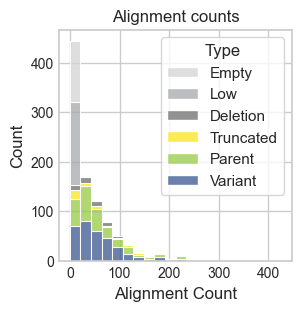

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

figure_dir = ''
sns.set(rc={'figure.figsize': (3, 3), 'font.family':  'sans-serif',
                'font.sans-serif': 'Arial', 'font.size': 12}, style='whitegrid')
parent = '#97CA43'
variant = '#3A578F'
deletion = '#6E6E6E'
truncation = '#FCE518'
empty = 'lightgrey'
low = '#A6A7AC'

palette = [empty, low, deletion, truncation, parent, variant]
sns.palette = palette

def set_ax_params(ax):
    ax.tick_params(direction='out', length=2, width=1.0)
    ax.tick_params(labelsize=10)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)
    
ax = sns.histplot(data=df, x="Alignment Count", hue="Type", bins=20, palette=palette, 
                  hue_order=['Empty', 'Low', 'Deletion', 'Truncated', 'Parent', 'Variant'], multiple="stack")
set_ax_params(ax)
plt.title('Alignment counts')
plt.savefig(f'{figure_dir}Figure1_Bar_AlignmentCounts.svg', bbox_inches='tight')

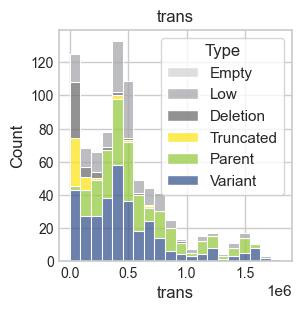

In [76]:
col = 'trans'
ax = sns.histplot(data=df, x=col, hue="Type", bins=20, palette=palette, hue_order=['Empty', 'Low', 'Deletion', 'Truncated', 'Parent', 'Variant'], multiple="stack")
set_ax_params(ax)
plt.title(f'{col}')
plt.savefig(f'{figure_dir}Figure1_Bar_Trans.svg', bbox_inches='tight')

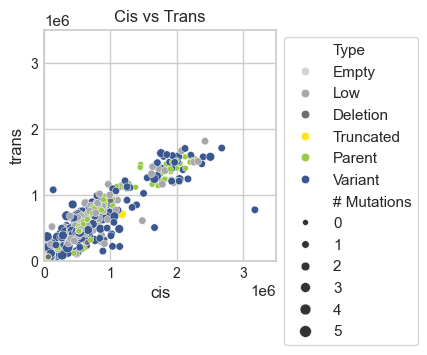

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

ax = sns.scatterplot(df, x='cis', y='trans', hue='Type', palette=palette, hue_order=['Empty', 'Low', 'Deletion', 'Truncated', 'Parent', 'Variant'],
                     size='# Mutations')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
set_ax_params(ax)
plt.xlim(0, 3.5*10**6)
plt.ylim(0, 3.5*10**6)
ax.yaxis.set_ticks([0, 1*10**6, 2*10**6, 3*10**6])

plt.title('Cis vs Trans')
plt.savefig(f'{figure_dir}Figure1_Scatter_Cis-Trans.svg', bbox_inches='tight')

In [78]:
stats_df[stats_df.index=='F70L']

,value_column_trans,number of wells with amino-acid substitutions_trans,mean_trans,std_trans,median_trans,amount greater than parent mean_trans,greater than > 1.5 parent_trans,man whitney U stat_trans,p-value_trans,value_column_cis,number of wells with amino-acid substitutions_cis,mean_cis,std_cis,median_cis,amount greater than parent mean_cis,greater than > 1.5 parent_cis,man whitney U stat_cis,p-value_cis
amino-acid_substitutions,,,,,,,,,,,,,,,,,,
F70L,trans plate standard norm,3,-1.622965,1.313151,-1.66667,-1.622965,False,606.0,0.057353,cis plate standard norm,3,4.446708,1.764155,4.640769,4.446708,True,2.0,0.000003


In [79]:
stats_df[stats_df.index=='F89S']

,value_column_trans,number of wells with amino-acid substitutions_trans,mean_trans,std_trans,median_trans,amount greater than parent mean_trans,greater than > 1.5 parent_trans,man whitney U stat_trans,p-value_trans,value_column_cis,number of wells with amino-acid substitutions_cis,mean_cis,std_cis,median_cis,amount greater than parent mean_cis,greater than > 1.5 parent_cis,man whitney U stat_cis,p-value_cis
amino-acid_substitutions,,,,,,,,,,,,,,,,,,
F89S,trans plate standard norm,1,2.102302,0.0,2.102302,2.102302,True,NaN,NaN,cis plate standard norm,1,-2.970071,0.0,-2.970071,-2.970071,False,NaN,NaN
